# Chapter 3 code

This is a shameless copy of Nielsen's JavasScript code in the HTML page at   
http://neuralnetworksanddeeplearning.com/chap3.html  
neuralnetworksanddeeplearning.com/js/saturation1.js  

From Nielsen's code:

    This is a paper.js widget to show a single neuron learning.  In
    particular, the widget is used to show the learning slowdown that
    occurs when the output is saturated.

    The same basic widget is used several times, in slightly different
    configurations.  paper.js makes it somewhat complex to reuse the
    code, so I have simply duplicated the code.  This can give rise to
    bugs if one is not careful to keep the code in sync, so I have
    separated the code into two pieces.

    The first piece is the header code.  This changes between widgets.
    It sets up things like the starting weight, bias, cost function,
    and so on -- things which may vary betweens widgets.

    The second piece is the body code.  This is almost exactly the same
    for the different widgets.  Note, however, that the costGraphX and
    epochX variables change name, due to a bug in the way paperjs
    handles scope.

    We can make these changes by searching on costGraph1 and replacing
    with costGraph2, costGraph3 etc, by replacing epoch1 with epoch2,
    epoch3 etc, and by replcacing cost1 with cost2, cost3 etc.

    This separation makes it easy to maintain the duplicated code.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact#, interactive, fixed, interact_manual
from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot
%matplotlib inline


In [62]:
def sigmoid(x):
    return 1. / (1. + np.exp(- x))

In [132]:
class quadratic_cost:
    
    def __init__(self):
        pass
    
    def fn(self, a):
        return a * a / 2
    
    def derivative(self, a):
        return a*a*(1-a)

class cross_entropy_cost:
    
    def __init__(self):
        pass
    
    def fn(self, a):
        return - np.log(1-a)
    
    def derivative(self, a):
        return 1/(1-a)

def outputValue(weight, bias):
    return sigmoid(weight+bias)


In [137]:

def plotSimpleNeuron(cost,startingWeight,startingBias,eta, numFrames,iplt=0):
    epochs = np.linspace(0,numFrames,numFrames+1)
    a = np.zeros_like(epochs)
    weight = np.zeros_like(epochs)
    bias = np.zeros_like(epochs)

    p = ryplot.Plotter(iplt,1,1,f'{type(cost).__name__},  w={startingWeight},  b={startingBias}',
                       figsize=(5,3),doWarning=False);

    weight[0] = startingWeight
    bias[0] = startingBias

    for i in range(numFrames):
        a[i] = outputValue(weight[i],bias[i])
        delta = cost.derivative(a[i])
        weight[i+1] = weight[i] - eta * delta
        bias[i+1] = bias[i] - eta * delta

    a[i+1] = outputValue(weight[i+1],bias[i+1]); 

    p.plot(1,epochs,cost.fn(a),'','Epoch','Value',label=['Cost']);    
#     p.plot(1,epochs,weight,label=['Weight']);      
#     p.plot(1,epochs,bias,'','Epoch','Value',label=['Bias']); 
    p.saveFig(f'../book/pic/ch3-{type(cost).__name__}-{int(10*startingWeight)}-{int(10*startingBias)}.pdf')
    iplt += 1
    return iplt


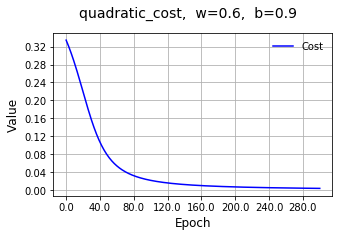

In [139]:
plotSimpleNeuron(cost=quadratic_cost(),startingWeight=0.6,startingBias=0.9,eta=0.15,numFrames=300);

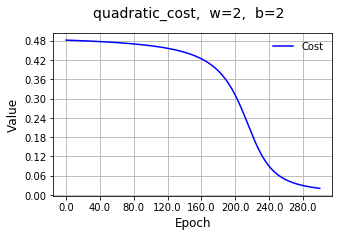

In [140]:
plotSimpleNeuron(cost=quadratic_cost(),startingWeight=2,startingBias=2,eta=0.15,numFrames=300);

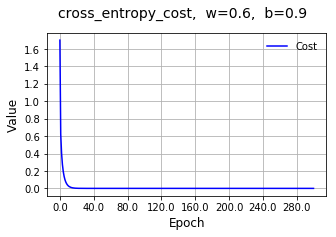

In [141]:
plotSimpleNeuron(cost=cross_entropy_cost(),startingWeight=0.6,startingBias=0.9,eta=0.15,numFrames=300);

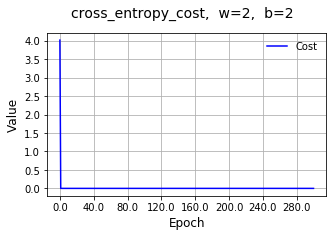

In [142]:
plotSimpleNeuron(cost=cross_entropy_cost(),startingWeight=2,startingBias=2,eta=0.15,numFrames=300);